## Download the IMDB reviews tokenized datasets

In [1]:
import tensorflow_datasets as tfds

imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords32k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\guilh\tensorflow_datasets\imdb_reviews\subwords32k\1.0.0.incompleteNMPVJA\imdb_reviews-trai…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\guilh\tensorflow_datasets\imdb_reviews\subwords32k\1.0.0.incompleteNMPVJA\imdb_reviews-test…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\guilh\tensorflow_datasets\imdb_reviews\subwords32k\1.0.0.incompleteNMPVJA\imdb_reviews-unsu…

Dataset imdb_reviews downloaded and prepared to C:\Users\guilh\tensorflow_datasets\imdb_reviews\subwords32k\1.0.0. Subsequent calls will reuse this data.


In [2]:
# Print description of features
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    'text': Text(shape=(None,), dtype=int64, encoder=<SubwordTextEncoder vocab_size=32650>),
})

In [3]:
# Take 2 training examples and print its contents
for example in imdb_subwords['train'].take(2):
  print(example)

(<tf.Tensor: shape=(143,), dtype=int64, numpy=
array([   56,    18,    41,   496,   674,    59,     3,   574, 32433,
          25,    34, 21905,    10,    39,  1626,  8210,    49,   548,
       17768,     3,  1730,    29,   112,   520,     2,    24,    14,
         256,   382,    34,    72,   312,   335,    10,  1216,     3,
         422,    72,   112,   170,   106,    33,  8157,    14,    59,
       32433,    11,  1133,  1964,     3,    56,    27,     8,    41,
         476, 15843, 32426,  1504,  4185,  2692,     3,    19,    96,
        2143,   199,    77,   178,    66,     1, 27162,   381, 15791,
          77,   281,    72,  5479,    22,  5693, 32509,     3,  4147,
       24625, 11296, 24690,    50,  1849, 27610,     2,     5,    54,
        4184, 32439,   157,  2520,    21,  8210,    18,   223,    24,
           4,  2143,  1041, 14185,    10,     4,    27,    13,    18,
        5414,     6,   111,   188,  4811,     3,    12,   274,  1357,
          13,    84,    29,   154,    46,  

In [4]:
# Get the encoder
tokenizer_subwords = info_subwords.features['text'].encoder

# Take 2 training examples and decode the text feature
for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

## Subword Text Encoding

In [5]:
# Print the subwords
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 'is_', 'br', 'in_', 's_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 'with_', 'for_', '.<', 'but_', 't_', 'on_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'be_', 'you_', ' "', 'it', 'he_', 'by_', 'at_', 'an_', 'one_', 'who_', 'from_', 'all_', 'like_', 'they_', '" ', 'or_', 'so_', 'has_', 'just_', 'about_', 'her_', ') ', 'This_', 'out_', 'some_', 'movie', 'very_', 'film', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'their_', 'even_', 'had_', 'really_', 'can_', 'were_', 'no_', 'my_', 'see_', 'she_', 'than_', '? ', 'there_', 'been_', 'into_', 'get_', '! ', 'will_', ' - ', 'much_', 'because_', 'story_', 'ing_', 'time_', 'most_', 'we_', 'other_', ': ', 'me_', 'do_', 'how_', 'also_', 'make_', 'don', 'could_', 'd_', 'its_', 'first_', 'people_', 'any_', 'great_', 'made_', "' ", 'But_', 'think_', " '", 'bad_', 'And_', 'ed_', 'It', 'A_', 'him_', 'being_', 'that', '

## Training the model

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = imdb_subwords['train'], imdb_subwords['test'],

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [7]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          2089600   
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2201089 (8.40 MB)
Trainable params: 220108

In [8]:
num_epochs = 10

# Set the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Start training
history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10


37/98 [==========>...................] - ETA: 36:54 - loss: 0.6579 - accuracy: 0.5921

## Visualize the results

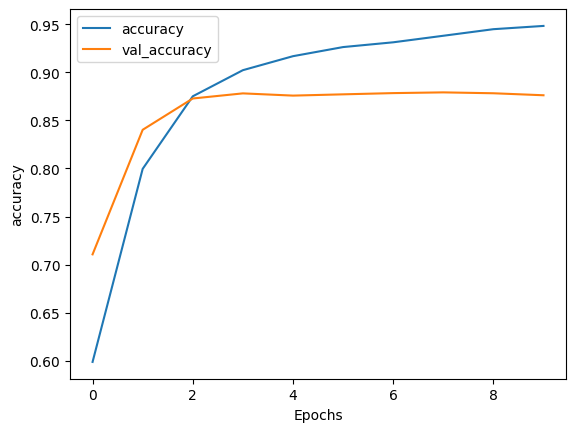

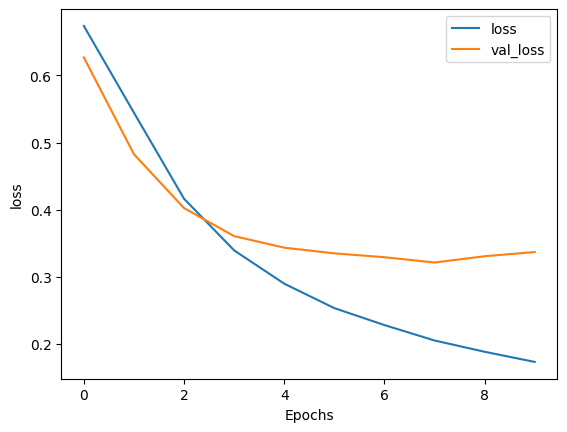

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
model.save('../models/positivity/v1.h5')

c:\Users\guilh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
